In [209]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
plt.rcParams["figure.figsize"] = (5,5)    #set default figure size
from random import uniform, seed
from math import sqrt
from dataclasses import dataclass

In [210]:
@dataclass
class Agent:
    AgentID: int
    Color: str 
    Happy: int 
    x_loc: float
    y_loc: float
    neighbors: []

In [211]:
Agent_Array = []
for i in range(0, 249):
    Agent_Array.append(Agent(AgentID=i, Color="orange", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), neighbors=[]))
for i in range(0, 249):
    Agent_Array.append(Agent(AgentID=i+250, Color="green", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), neighbors=[]))

In [212]:
def findNeighborDistances(Agent_Array):
    for i in range(0, len(Agent_Array)):
        Agent_Array[i].neighbors.clear()
        for j in range(0, len(Agent_Array)):
            Agent_Array[i].neighbors.append((Agent_Array[j].AgentID, sqrt((Agent_Array[i].x_loc-Agent_Array[j].x_loc)**2+(Agent_Array[i].y_loc-Agent_Array[j].y_loc)**2)))

In [220]:
def assignHappiness(Agent_Array, bias, k):
    for i in range(0, len(Agent_Array)):
        closestNeighbors = sorted(Agent_Array[i].neighbors, key = lambda x: x[1])[1:(k+1)]
        matchedNeighbors = 0
        AgentColor = Agent_Array[i].Color
        for j in range(0, len(closestNeighbors)):
            neighborID = closestNeighbors[j][0]
            for Agent in Agent_Array:
                if Agent.AgentID == neighborID:
                    if Agent.Color==AgentColor:
                        matchedNeighbors = matchedNeighbors + 1
        if(matchedNeighbors/k > bias):
            Agent_Array[i].Happy = 1
        else:
            Agent_Array[i].Happy = 0

In [221]:
def decideWhoMoves(Agent_Array):
    N = len(Agent_Array)
    for i in range(0, N):
        if(Agent_Array[i].Happy == 0):
            Agent_Array[i].x_loc=uniform(0, 1)
            Agent_Array[i].y_loc=uniform(0, 1)

In [222]:
def plotNeighborhood(Agent_Array):
    df = pd.DataFrame( columns=['x_loc', 'y_loc', 'color'])
    i=0
    for Agent in Agent_Array:
        df.loc[i] = [Agent.x_loc, Agent.y_loc, Agent.Color]
        i = i+1
    plt.scatter(df["x_loc"], df["y_loc"], c = df["color"])
    plt.show()

In [226]:
def checkHappiness(Agent_Array):
    NumHappy = 0
    for Agent in Agent_Array:
        if Agent.Happy == 1:
            NumHappy = NumHappy+1
    print("Percent of happy agents: ", 100*NumHappy/len(Agent_Array), "% \n")

In [229]:
def runSim(Agent_Array, steps, bias, k):
    print("Iteration 0: \n")
    plotNeighborhood(Agent_Array)
    for i in range(0, steps):
        findNeighborDistances(Agent_Array)
        assignHappiness(Agent_Array, bias, k)
        decideWhoMoves(Agent_Array)
        print("Iteration ", i+1, " : \n")
        checkHappiness(Agent_Array)
        plotNeighborhood(Agent_Array)

Iteration 0: 



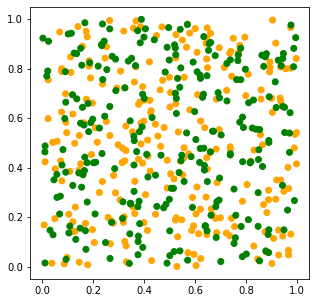

Iteration  1  : 

Percent of happy agents:  31.526104417670684 % 



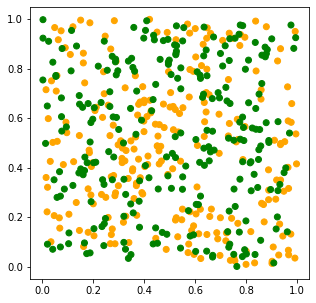

Iteration  2  : 

Percent of happy agents:  47.59036144578313 % 



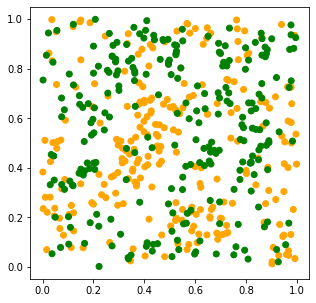

Iteration  3  : 

Percent of happy agents:  64.2570281124498 % 



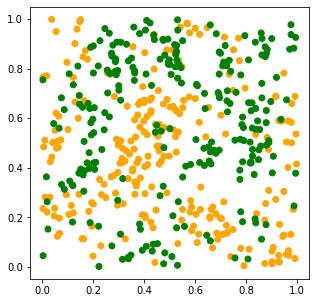

Iteration  4  : 

Percent of happy agents:  77.91164658634538 % 



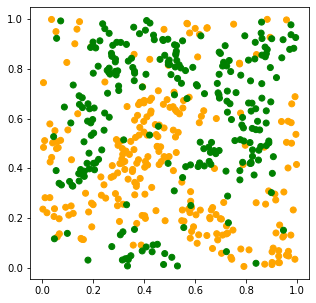

Iteration  5  : 

Percent of happy agents:  87.14859437751004 % 



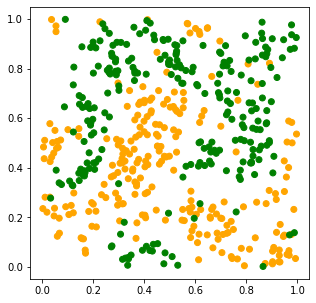

Iteration  6  : 

Percent of happy agents:  91.16465863453816 % 



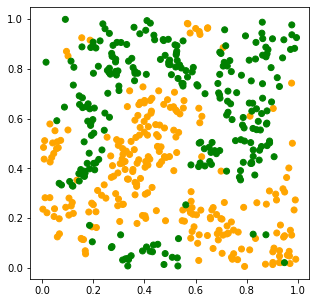

Iteration  7  : 

Percent of happy agents:  95.38152610441767 % 



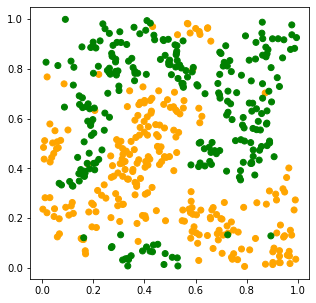

Iteration  8  : 

Percent of happy agents:  96.98795180722891 % 



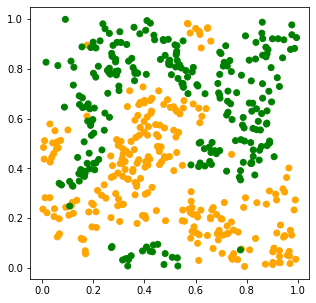

Iteration  9  : 

Percent of happy agents:  98.79518072289157 % 



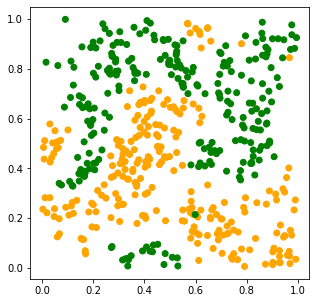

Iteration  10  : 

Percent of happy agents:  99.19678714859438 % 



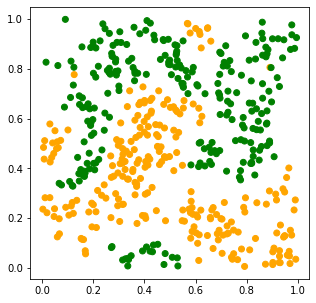

In [230]:
Agent_Array = []
for i in range(0, 249):
    Agent_Array.append(Agent(AgentID=i, Color="orange", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), neighbors=[]))
for i in range(0, 249):
    Agent_Array.append(Agent(AgentID=i+250, Color="green", Happy=0, x_loc=uniform(0, 1), y_loc=uniform(0, 1), neighbors=[]))
    
runSim(Agent_Array, 10, 0.5, 10)